# Assi, Scale e Legende 

Una funzione di **scale** permette la codifica visuale delle informazioni presenti in un dataset tramite i canali visivi di un grafico.

Una funzione di **scale** associa ad un valore in input (dominio) un valore visivo (output).

Per interpretare il risultato di queste funzioni, che altrimenti sarebbe insondabile, abbiamo bisogno di: 
- **assi**: nel caso in cui il dato mappato sia numerico,
- **legende**: nel caso di dati categorici.

Un grafico senza assi o legenda sarebbe indecifrabile, osserveremo solamente una serie di punti, sbarre o altre forme disegnate su una tela. Avremmo ottenuto un quadro, non un grafico. 

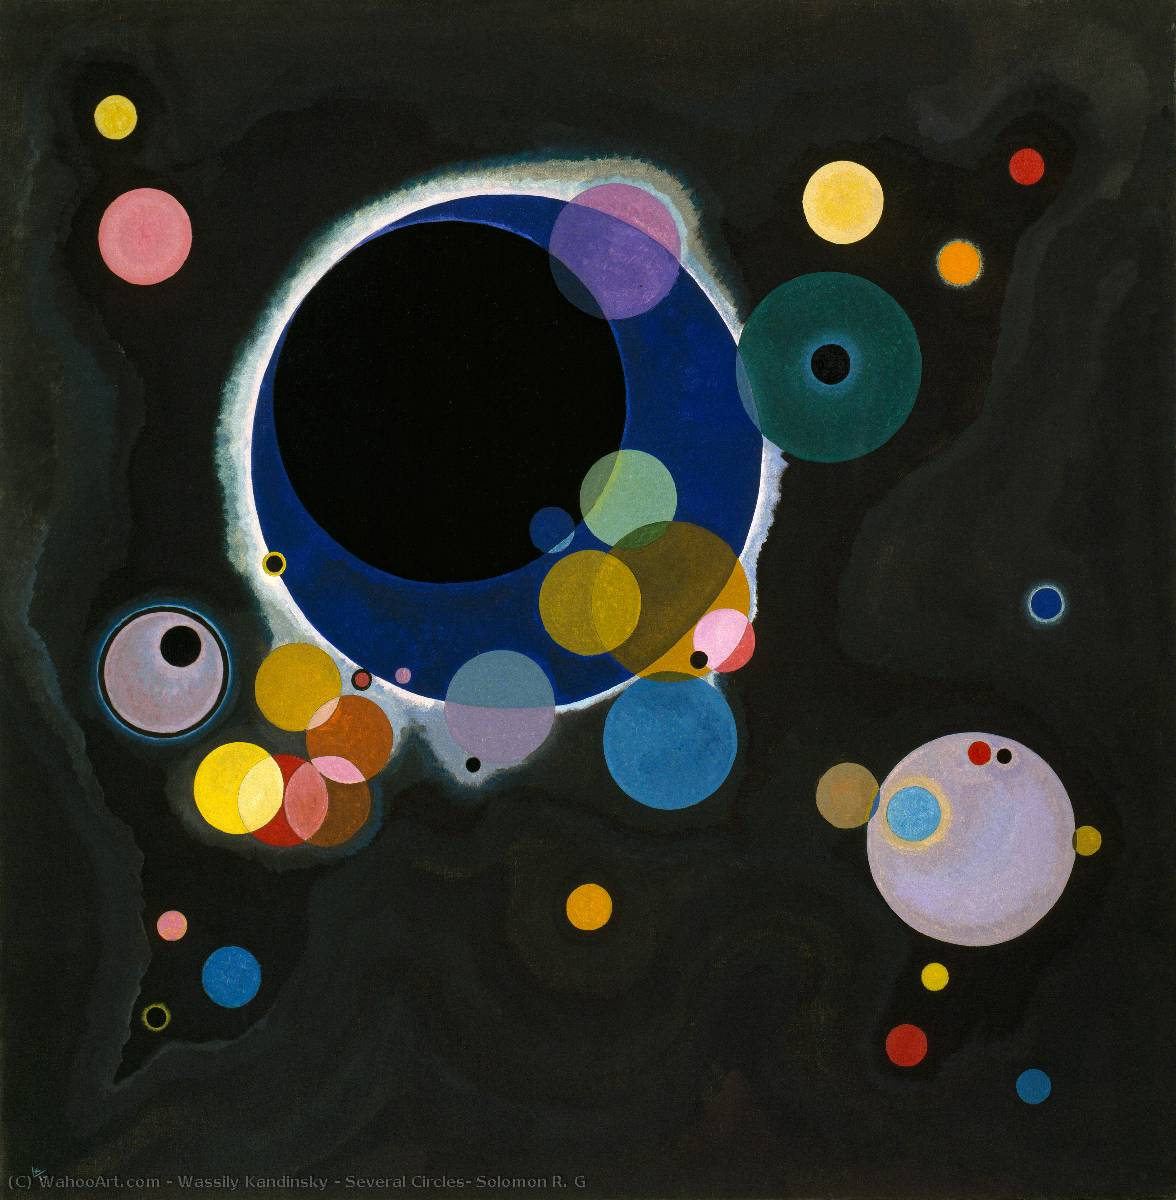

In questo *notebook* vedremo come lavorare al meglio con questi oggetti con *Altair*.  Il dataset che utilizzeremo raccoglie dati relativi all'efficacia di alcuni antibiotici. 

In [9]:
import pandas as pd
import altair as alt

Dopo la Seconda Guerra Mondiale, gli antibiotici erano considerati "farmaci miracolosi", in quanto rappresentavano un rimedio facile per patologie fino a quel momento incurabili. Per scoprire quale farmaco fosse più efficace per una determinata infezione batterica, sono stati raccolti i risultati dei tre antibiotici più popolari su 16 batteri.

In [10]:
antibiotics = 'https://cdn.jsdelivr.net/npm/vega-datasets@1/data/burtin.json'
pd.read_json(antibiotics)

,Bacteria,Penicillin,Streptomycin,Neomycin,Gram_Staining,Genus
0,Aerobacter aerogenes,870.000,1.00,1.600,negative,other
1,Bacillus anthracis,0.001,0.01,0.007,positive,other
2,Brucella abortus,1.000,2.00,0.020,negative,other
3,Diplococcus pneumoniae,0.005,11.00,10.000,positive,other
4,Escherichia coli,100.000,0.40,0.100,negative,other
5,Klebsiella pneumoniae,850.000,1.20,1.000,negative,other
6,Mycobacterium tuberculosis,800.000,5.00,2.000,negative,other
7,Proteus vulgaris,3.000,0.10,0.100,negative,other
8,Pseudomonas aeruginosa,850.000,2.00,0.400,negative,other
9,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative,Salmonella


I valori numerici nella tabella indicano la concentrazione minima inibente (MIC), una misura dell'efficacia dell'antibiotico, che rappresenta la concentrazione di antibiotico (in microgrammi per millilitro) necessaria per impedire la crescita in vitro. La reazione dei batteri a una procedura chiamata colorazione di Gram è descritta dal campo nominale Gram_Staining. I batteri che diventano blu scuro o viola sono Gram-positivi. Altrimenti, sono Gram-negativi.

Esaminando diverse visualizzazioni di questo set di dati, chiediamoci: cosa potremmo imparare sull'efficacia relativa degli antibiotici? Cosa potremmo imparare sulle specie batteriche in base alla loro risposta antibiotica?

## ⚖️ Configurare *scale* ed assi

Quando si applica una funzione *scale* ai dati, associamo ai valori un rappresentazione in pixel sul grafico. Gli **assi** ci permettono di visualizzare le distanze *relative* fra i valori, interpretando al meglio il grafico. 

Sia $L$ la distanza fra due valori diversi $x_1, x_2$ del dataset. Sia $\phi$ la funzione di *scale* considerata. Ad  $x_1, x_2$ associamo i pixel $\phi(x_1), \phi(x_2)$. La distanza relativa fra i pixel sara definita:
$$\phi(L) =|\phi(x_1) - \phi(x_2)|$$

Le funzioni di *scale* si differenziano per come calcolano $\phi(L)$. Di default, la funzione di *scale* utilizzata in *Altair* e lineare, ovvero: 
$$\phi(L) = L$$

Altre funzioni molto utilizzate sono: 
- *scale* logaritmico: $\phi(L) = \log(L)$
- *scale* quadratico: $\phi(L) = L^2$
- *scale* radice quadrata: $\phi(L) = \sqrt(L)$

In [11]:
# dot plot MIC della Neomicina
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q'),
    alt.Tooltip(['Bacteria:N'])
)

alt.Chart(...)

La funzione di *scale*, applicata a valori numerali, mappa i dati presenti nel dataset su un asse numerico, come quello che si vede in figura. La mappatura di default e **lineare**.

In [13]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          scale=alt.Scale(type='sqrt')),
          alt.Tooltip(['Bacteria:N'])
)

alt.Chart(...)

In [14]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          scale=alt.Scale(type='log')),
          alt.Tooltip(['Bacteria:N', 'Neomycin:Q'])
)

alt.Chart(...)

> 
> ❓ Perche e utile modificare la funzione di *scale*?
> 

E possibile modificare gli assi di un grafico per massimizzarne la chiarezza.

In [15]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending', # orientamento dell'asse 
          scale=alt.Scale(type='log'), # tipo scale
          axis=alt.Axis(orient='top'), # posizionamento 
          title='Neomycin MIC (μg/ml, reverse log scale)') # descrizione dell'asse 
)

alt.Chart(...)

Adesso proviamo a rispondere ad un'altra domanda:
 
*Come possiamo paragonare l'efficacia della Neomicina rispetto a quella di altri antibiotici?*

In [ ]:
# Neomicina/Streptomicina
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Streptomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Streptomycin MIC (μg/ml, reverse log scale)'),
    alt.Tooltip(['Bacteria:N', 'Neomycin:Q', 'Streptomycin:Q'])
)

alt.Chart(...)

In [19]:
# Neomicina/Penicillina
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Penicillin MIC (μg/ml, reverse log scale)'),    
      
      alt.Tooltip(['Bacteria:N', 'Neomycin:Q', 'Penicillin:Q'])
)

alt.Chart(...)

Approfondiamo la relazione Neomicina/Penicillina. Infatti alcuni batteri sono sensibili alla Penicillina e non alla Neomicina e viceversa. 

Possiamo:
- rendere gli assi della stessa lunghezza: definiamo una specifica lunghezza e larghezza (in pixel) per il grafico,
- definare lo stesso dominio di partenza per la funzione di *scale*.

In questo modo otteniamo un grafico migliore, dove il paragone fra i due farmaci puo essere effettuato in maniera diretta, senza porre attenzione alle scale dei valori rappresentati. 

In [21]:
# allungamento degli assi
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
      alt.Tooltip(['Bacteria:N', 'Neomycin:Q', 'Penicillin:Q'])
      
).properties(width=250, height=250)

alt.Chart(...)

A questo non rimane che rendere il grafico ancora piu chiaro eliminando le linee di intersezione che lo rendono piu confusionario del necessario.  

In [ ]:
# rimozione, mantenimento delle linee relative all'ordine di grandezza 
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5), # definito il numero di linee
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5), # definito il numero di linee 
          title='Penicillin MIC (μg/ml, reverse log scale)'),
alt.Tooltip(['Bacteria:N', 'Neomycin:Q', 'Penicillin:Q'])
).properties(width=250, height=250)

alt.Chart(...)

Per ottenere questo grafico abbiamo utilizzato il parametro `tikCount()` della funzione `alt.Axis()`. Questo permette di *suggerire* ad *Altair* il numero voluto di linee di griglia nel grafico. Poi automaticamente il pacchetto elabora il grafico ottenendo un risultato vicino a quello voluto. 

In [23]:
# rimozione griglia
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(grid = False), # disattivare le griglia 
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(grid = False), # disattivare la griglia
          title='Penicillin MIC (μg/ml, reverse log scale)'),
alt.Tooltip(['Bacteria:N', 'Neomycin:Q', 'Penicillin:Q'])
).properties(width=250, height=250)

alt.Chart(...)

## 💭 Legenda 

Se gli assi servono ad intepretare le rappresentazioni di dati continui, la **legenda** assume un ruolo fondamentale nel caso in cui ci sia bisogno di comprendere relazioni fra un campi **categorico** ed un canale grafico del *Chart* (forma, colore). Infatti anche questo tipo di mappatura viene effettuato tramite una specifica funzione di *scale* $\phi$ che, in questo caso ha come dominio un campo **categorico** del dataset e come immagine un insieme discreto di elementi grafici: **forme, colori**.

### 💌 Colorazione per valori non numerici

In [25]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N'), # categorical encoding of 'Gram staining' field with the shape Chart channel
    alt.Tooltip(['Bacteria:N', 'Neomycin:Q', 'Penicillin:Q'])
).properties(width=250, height=250)

alt.Chart(...)

Qualore volessimo scegliere i colori del *mark*, possiamo farlo specificando il *dominio* della funzione di *scale* (i valori da mappare) e la sua immagine (i colori specifici che vogliamo nel grafico).

In [26]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N',
          scale=alt.Scale(domain=['negative', 'positive'], range=['hotpink', 'purple'])
          # mappatura dei valori 'negative'/'positive' coi colori 'hotpink'/'purple'
    )
).properties(width=250, height=250)

alt.Chart(...)

Se si ritenesse opportuno cambiare il **posizionamento** della legenda rispetto al grafico: 

In [ ]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N',
          scale=alt.Scale(domain=['negative', 'positive'], range=['hotpink', 'purple']),
          legend=alt.Legend(orient='left') # specificare posizione
    )
).properties(width=250, height=250)

alt.Chart(...)

Adesso ribaltiamo la domanda che ci siamo posti fino ad ora: 

*come possiamo interpretare la risposta di un batterio ad un determinato antibiotico al fine di comprendere meglio il batterio stesso?*

In [28]:
# scatter plot
# color channel codificato con la specie del batterio
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:N')
).properties(width=250, height=250)

alt.Chart(...)

Visto che i batteri sono piu di 10, *Altair* ripete i colori del *Mark*, visto che utilizza una palette di default di 10 colori. Specifichiamo allora di utilizzare una palette specifica con 2- colori: *tableau20*

In [29]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:N',
          scale=alt.Scale(scheme='tableau20')) # palette specifica
).properties(width=250, height=250)

alt.Chart(...)

Anche se la colorazione cosi ottenuta non e ridondante, il grafico che otteniamo e comunque confusionario. Infatti specie batteriche che appartengono alla stessa famiglia sono mappate su colori radicalmente diversi, perdendo questa informazione. 

Un modo in cui la possiamo recuperare e quello di definire il campio `Bacteria` come **ordinale**. In questo modo *Altair* inferisce automaticamente che il campo puo essere ordinato e lo mappa su una **scala di colori** invece che su colori diversi.

In [30]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:O')
).properties(width=250, height=250)

alt.Chart(...)

Se volessimo cambiare la scala di colori su cui viene mappato il campo ordinale: 

In [ ]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:O',
          scale=alt.Scale(scheme='viridis')) # definito schema di colori specifico
).properties(width=250, height=250)

alt.Chart(...)

Nonostante il grafico che abbiamo ottenuto sia sicuramente migliore di quello iniziale, possiamo fare ancora di meglio. Infatti, nonostante i cluster nel grafico inizino a condividere gli stessi colori, abbiamo ancora il problema che due batteri, appartenenti allo stesso `Genus` sono colorati molto diversamente. 

In [33]:
pd.read_json(antibiotics)

,Bacteria,Penicillin,Streptomycin,Neomycin,Gram_Staining,Genus
0,Aerobacter aerogenes,870.000,1.00,1.600,negative,other
1,Bacillus anthracis,0.001,0.01,0.007,positive,other
2,Brucella abortus,1.000,2.00,0.020,negative,other
3,Diplococcus pneumoniae,0.005,11.00,10.000,positive,other
4,Escherichia coli,100.000,0.40,0.100,negative,other
5,Klebsiella pneumoniae,850.000,1.20,1.000,negative,other
6,Mycobacterium tuberculosis,800.000,5.00,2.000,negative,other
7,Proteus vulgaris,3.000,0.10,0.100,negative,other
8,Pseudomonas aeruginosa,850.000,2.00,0.400,negative,other
9,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative,Salmonella


Proviamo a colorare in base al genere anziché ai batteri. Per farlo, aggiungeremo una trasformazione calcolata che:
1. suddivide il nome del batterio in base agli spazi: `split(datum.Bacteria, " ")`
2. prende la prima parola nell'array risultante. `[0]`

Possiamo quindi codificare il campo Genere risultante utilizzando lo schema di colori di `Tableau20`.

(Si noti che il dataset sugli antibiotici include un campo Genere precalcolato, ma lo ignoreremo qui per esplorare ulteriormente le trasformazioni dei dati di Altair.)

In [34]:
alt.Chart(antibiotics).mark_circle(size=80).transform_calculate(
    Genus='split(datum.Bacteria, " ")[0]' # 1 and 2
).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Genus:N',
          scale=alt.Scale(scheme='tableau20'))
).properties(width=250, height=250)

alt.Chart(...)

Sebbene i dati siano meglio suddivisi per genere, questa cacafonia di colori non sembra particolarmente utile.

Se osserviamo attentamente alcuni dei grafici precedenti, possiamo vedere che solo una manciata di batteri ha un genere condiviso con un altro batterio: Salmonella, Staphylococcus e Streptococcus. Per focalizzare il nostro confronto, potremmo aggiungere colori solo per questi valori specifici.

Aggiungiamo un'altra trasformazione `calculate` che accetta un *genus*, lo mantiene se è uno dei valori ripetuti e altrimenti utilizza la stringa `"Other"`.

Inoltre, possiamo aggiungere codifiche di colore personalizzate utilizzando array di dominio e intervallo espliciti per la scala di codifica dei colori.

In [35]:
alt.Chart(antibiotics).mark_circle(size=80).transform_calculate(
  Split='split(datum.Bacteria, " ")[0]'
).transform_calculate(
  Genus='indexof(["Salmonella", "Staphylococcus", "Streptococcus"], datum.Split) >= 0 ? datum.Split : "Other"'
).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Genus:N',
          scale=alt.Scale(
            domain=['Salmonella', 'Staphylococcus', 'Streptococcus', 'Other'],
            range=['rgb(76,120,168)', 'rgb(84,162,75)', 'rgb(228,87,86)', 'rgb(121,112,110)']
          ))
).properties(width=250, height=250)

alt.Chart(...)

### 💯 Colorazione per valori numerici 

Possiamo anche *mappare* campi numerici sul *channel* colore del grafico. 

In [ ]:
# vertical heatmap
alt.Chart(antibiotics).mark_rect().encode(
    alt.Y('Bacteria:N',
      sort=alt.EncodingSortField(field='Penicillin', op='max', order='descending')
    ),
    alt.Color('Penicillin:Q')
)

alt.Chart(...)

Possiamo migliorare ulteriormente questo grafico, rendendo la colorazione piu omogenea, specificando un gradiente di colore che varia con il **logaritmo** della distanza fra i valori originali del campo *penicillina*. In questo caso e utile notare il parallelo con la funzione di **scale logaritmica** di cui abbiamo parlato all'inizio. 

In [42]:
alt.Chart(antibiotics).mark_rect().encode(
    alt.Y('Bacteria:N',
      sort=alt.EncodingSortField(field='Penicillin', op='max', order='descending'),
      axis=alt.Axis(
        orient='right',     # orient axis on right side of chart
        titleX=7,           # set x-position to 7 pixels right of chart
        titleY=-2,          # set y-position to 2 pixels above chart
        titleAlign='left',  # use left-aligned text
        titleAngle=0        # undo default title rotation
      )
    ),
    alt.Color('Penicillin:Q',
      scale=alt.Scale(type='log', scheme='plasma', nice=True), # logaithmic color gradient
      legend=alt.Legend(titleOrient='right', tickCount=5),
      title='Penicillin MIC (μg/ml)'
    )
)

alt.Chart(...)

In alternativa possiamo completamente rimuovere il titolo dell'asse, ottenendo un grafico ancora piu pulito. 

In [44]:
alt.Chart(antibiotics, title='Penicillin Resistance of Bacterial Strains').mark_rect().encode(
    alt.Y('Bacteria:N',
      sort=alt.EncodingSortField(field='Penicillin', op='max', order='descending'),
      axis=alt.Axis(orient='right', title=None)
    ),
    alt.Color('Penicillin:Q',
      scale=alt.Scale(type='log', scheme='plasma', nice=True),
      legend=alt.Legend(titleOrient='right', tickCount=5),
      title='Penicillin MIC (μg/ml)'
    ),
    alt.Tooltip(['Penicillin:Q'])
).configure_title(
  anchor='start', # anchor and left-align title
  offset=5        # set title offset from chart
)

alt.Chart(...)